<a href="https://colab.research.google.com/github/anshu57/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

##Data Initialization

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised ML Regression/SeoulBikeData.csv',encoding= 'unicode_escape')

In [5]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
dataset.shape

(8760, 14)

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Data do not have any null value

In [8]:
#Rename columns
dataset = dataset.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

In [9]:
dataset.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [10]:
# duplicate
len(dataset[dataset.duplicated()])

0

Data Set do not contain any duplicate values.

#Exploratory Data Analysis

In [11]:
dataset['Rented_Bike_Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [12]:
#Converting the Date column in Datetime Dtype
dataset['Date']=pd.to_datetime(dataset['Date'])

#Breaking Down the Date into 3 Components
dataset['Day']=dataset['Date'].dt.day
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year

In [13]:
dataset

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


In [14]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day',
       'Month', 'Year'],
      dtype='object')

##Univariate Analysis

In [15]:
categorical_features = dataset.describe(include = ['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

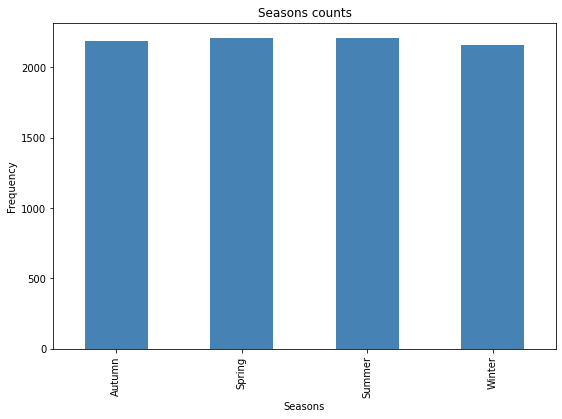

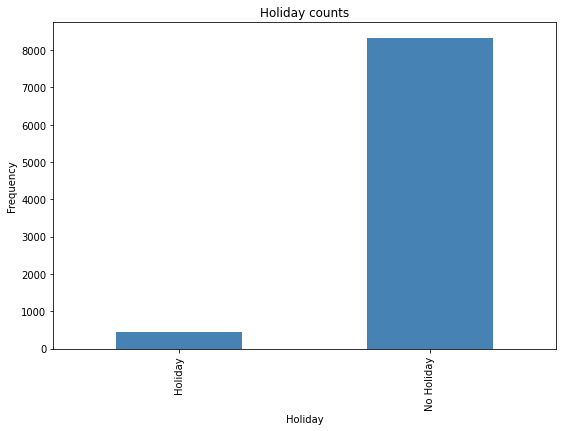

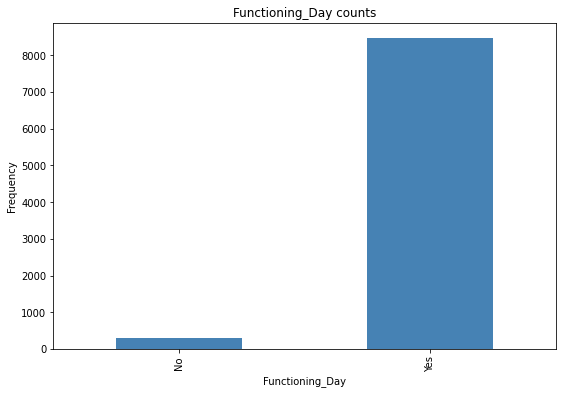

In [16]:
#Bar Plot for Categorical variables
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [17]:
dataset['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [18]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [19]:
dataset['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

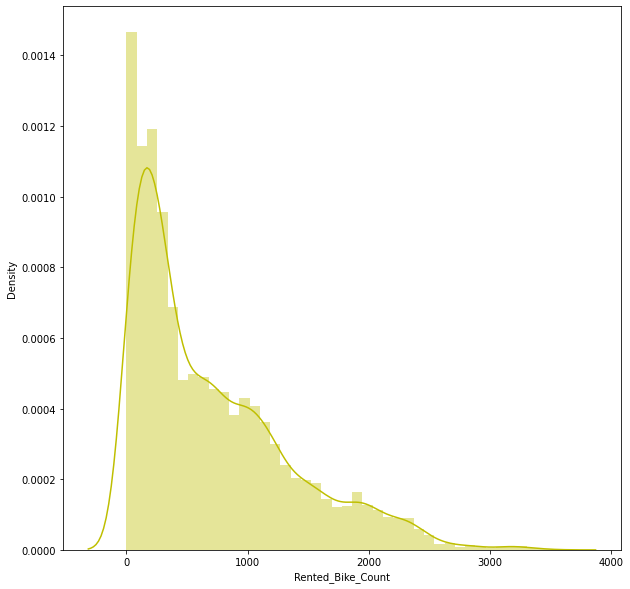

In [20]:
# Dependent variable 'Rented_Bike_Count'
plt.figure(figsize=(10,10))
sns.distplot(dataset['Rented_Bike_Count'],color="y")

In [21]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Day', 'Month', 'Year'],
      dtype='object')

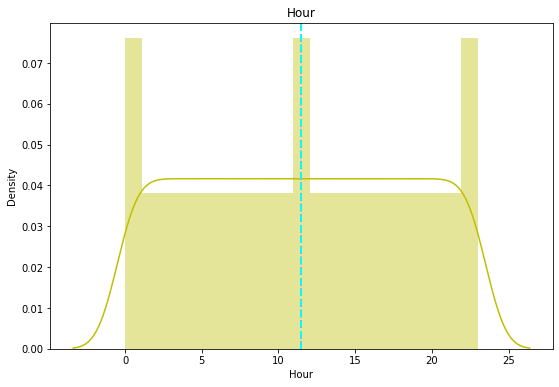

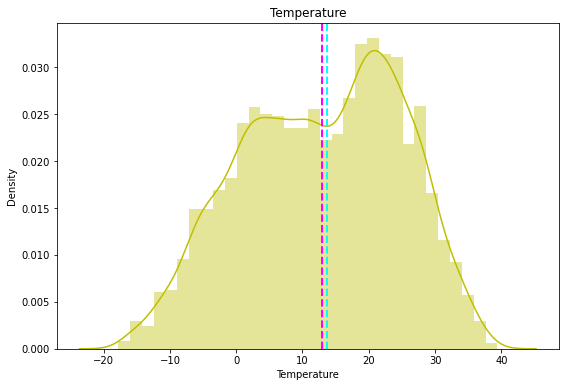

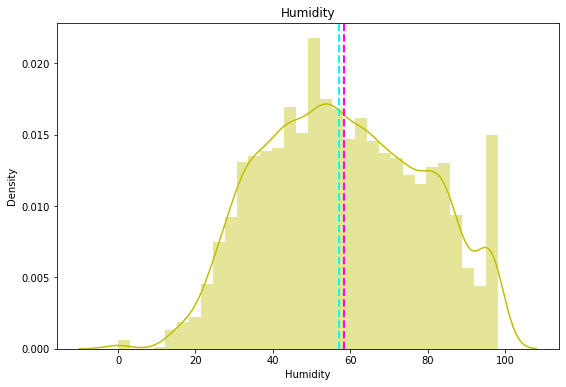

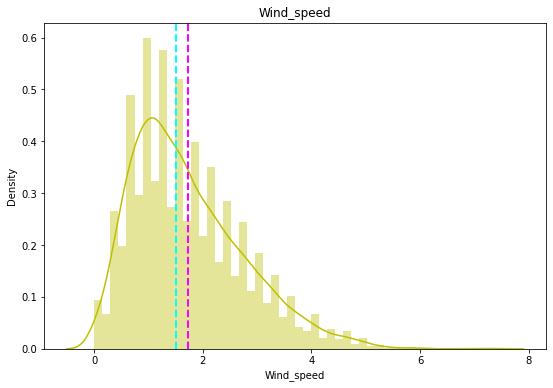

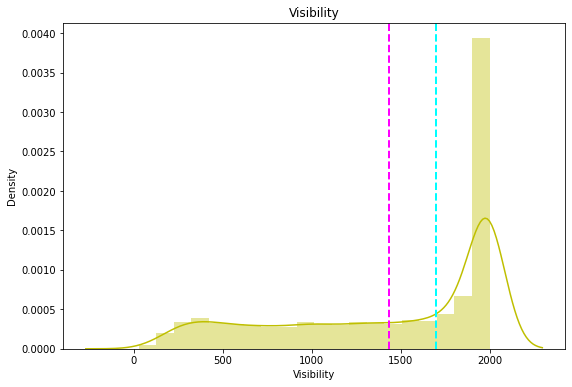

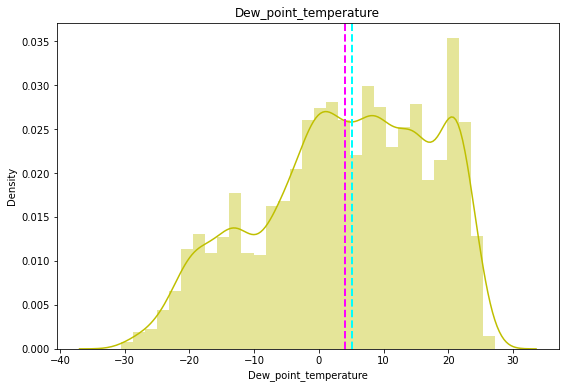

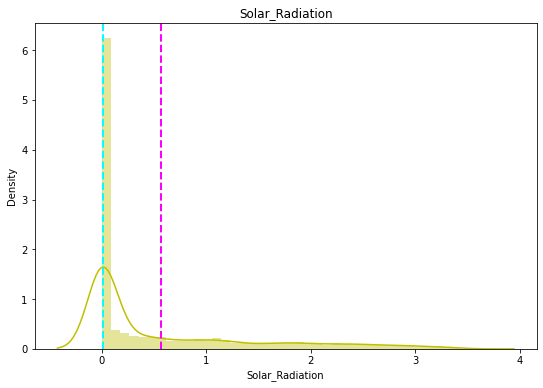

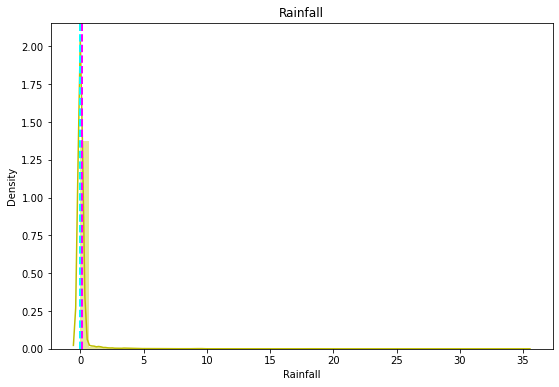

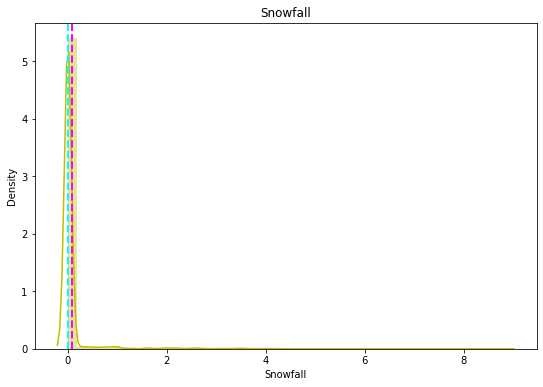

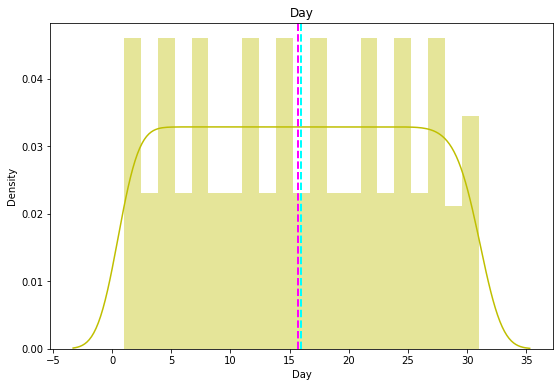

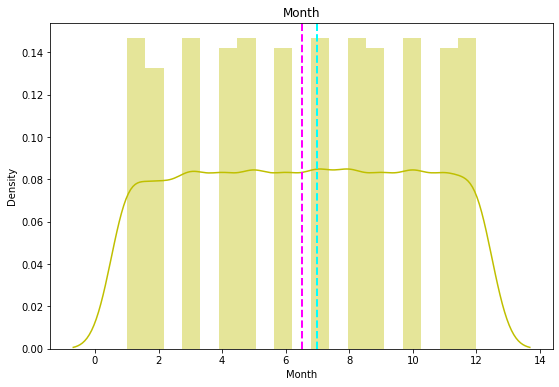

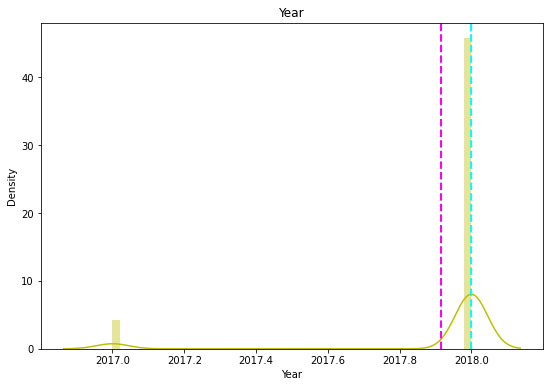

In [22]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    sns.distplot(feature,color="y")
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)      
    ax.set_title(col)
plt.show()

In [23]:
dataset['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [24]:
dataset.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [25]:
dataset['Month_name']=dataset['Month'].map({1:'Janyuary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


In [26]:
#bar plot for the month_year group
month_year_group= dataset.groupby(by=['Month','Month_name','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.bar(month_year_group,y= 'Rented_Bike_Count',x= 'Month_name',color= 'Year',facet_row= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

#Bivariate Analysis

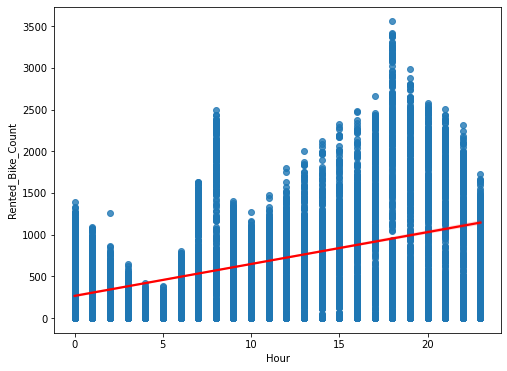

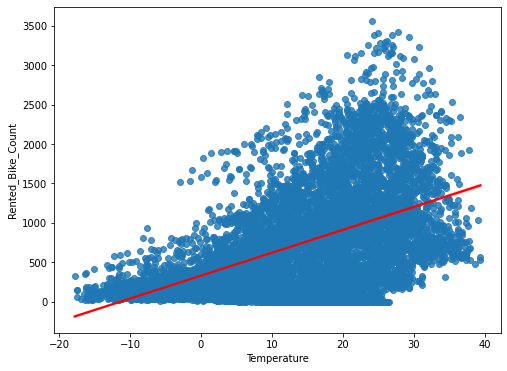

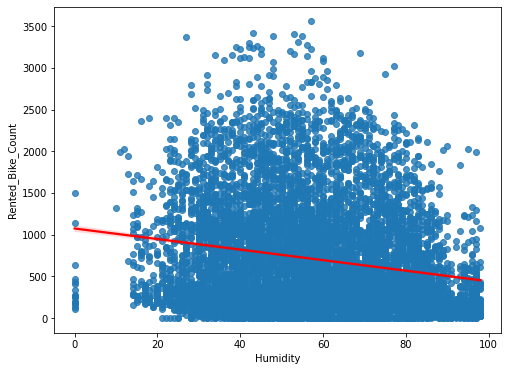

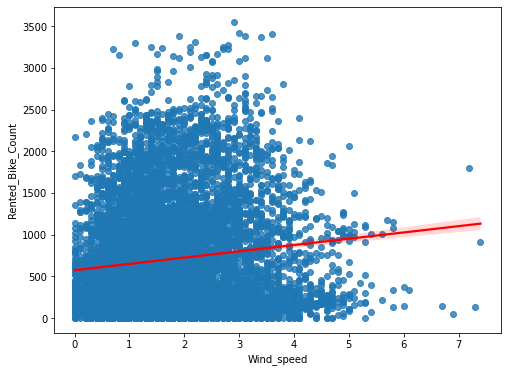

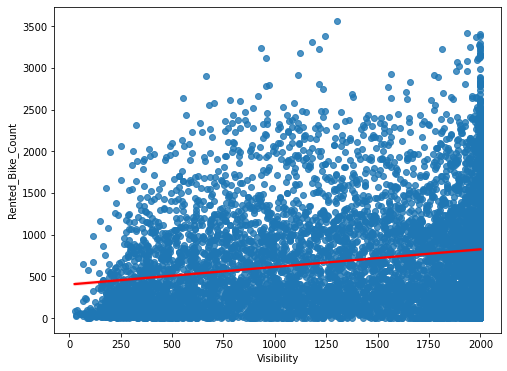

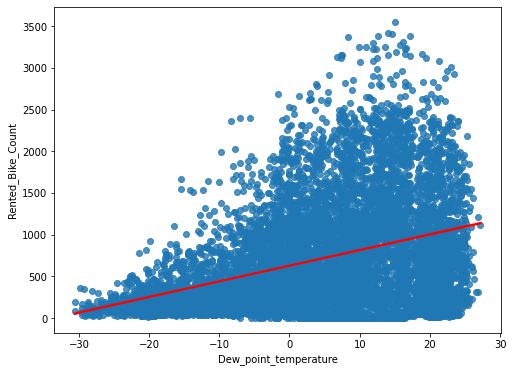

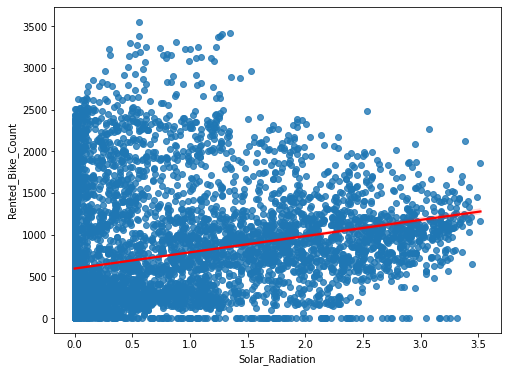

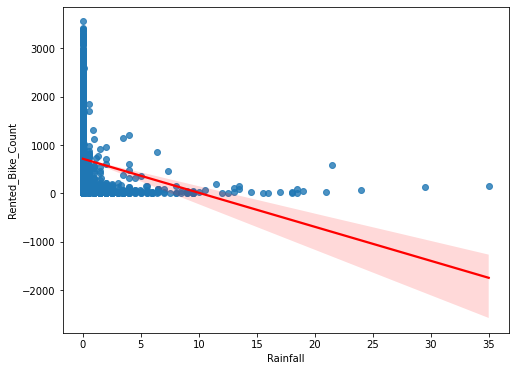

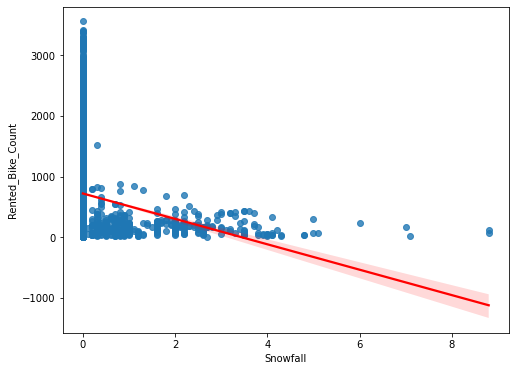

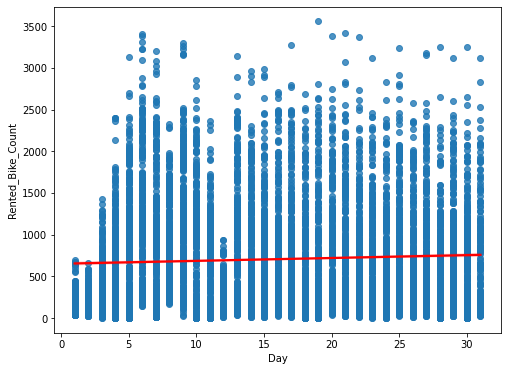

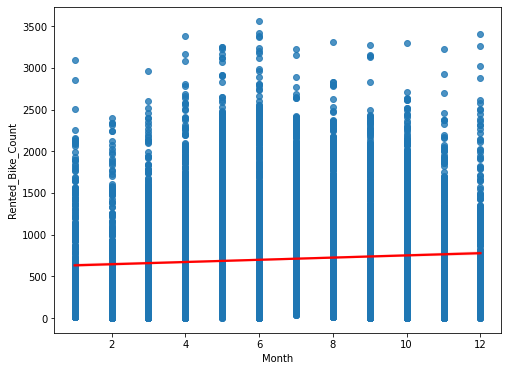

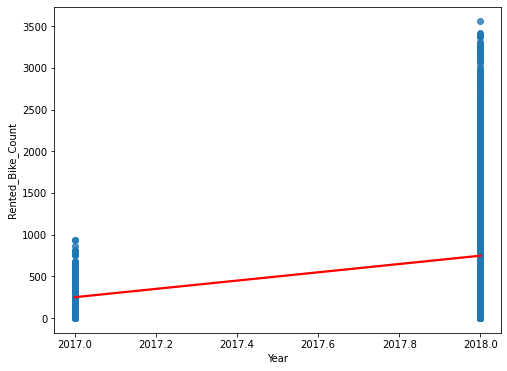

In [27]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col in numeric_features[1:]:
  plt.figure()
  sns.regplot(x=dataset[col], y = dataset['Rented_Bike_Count'], line_kws={"color": "Red"})

##Effects of Numerical features in rented bike count:-

* **Hour:** Demand of Bike is mostly in evening between 3 to 8 pm, also the least demand is at morning 5pm. 
* **Temperature:** People prefer to rent bike at normal temperature of 20°C. to 30°C.  Hence it is poitively related to Rented Bike.
* **Humidity:** It is negatively correlated , as people prefer to rent a bike less if there is more moisture in air.
* **Wind_speed:** Wind Speed doesn't effect much for rent a bike but is slitly positively correlated.
* **Visibility:** It does not effect, similar to wind speed, it is positively correlated.
* **Dew point temperature:** The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.
* **SnowFall and Rainfall**: People don't prefer to rent a bike, when there is rainfall or snowfall.


###Outlier detection

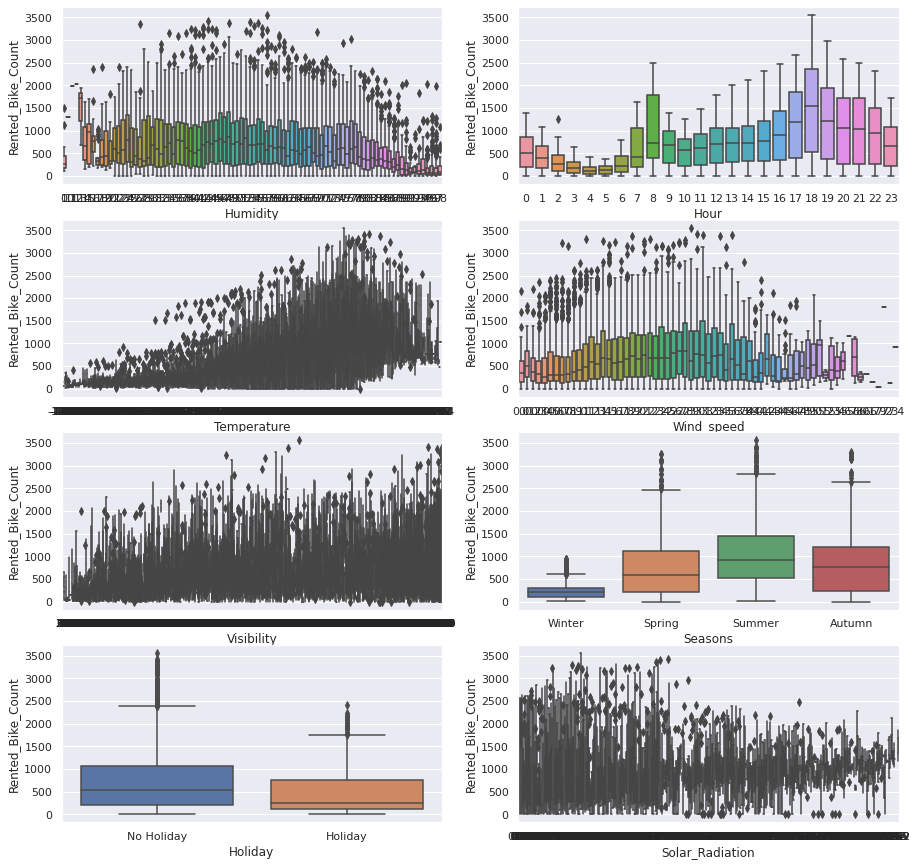

In [28]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][1])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])


In [29]:
#Correlation
np.round(dataset.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Day                      0.047
Month                    0.071
Year                     0.215
Name: Rented_Bike_Count, dtype: float64

Maximum correlation is shown by hour and temperature with Rented Bike Count.

In [30]:
# dropping the non-perfoming column
dataset.drop('Month_name',axis=1,inplace=True)
dataset.drop('Date',axis=1,inplace=True)

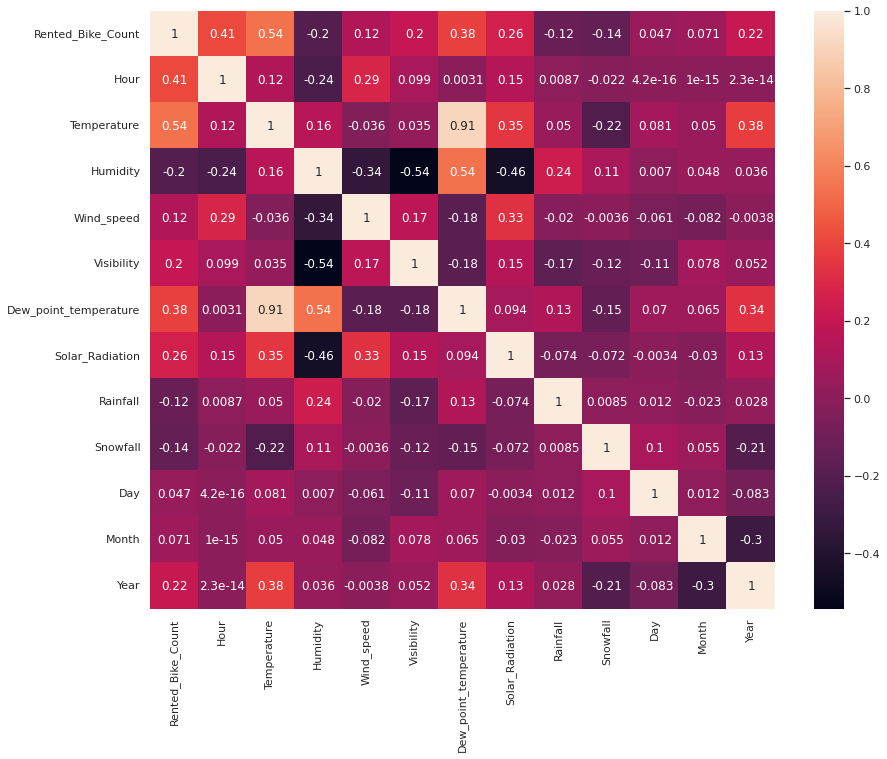

In [31]:
#get correlations of each features in dataset
#plot heat map
plt.figure(figsize=(14,11))
g=sns.heatmap(dataset.corr(),annot=True)

Temperature and Dew Point temperature ar highly correlated.We can add them to make one single column

In [32]:
dataset['Temperature_and_dp_temperature']=dataset['Temperature']+dataset['Dew_point_temperature']
dataset.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)

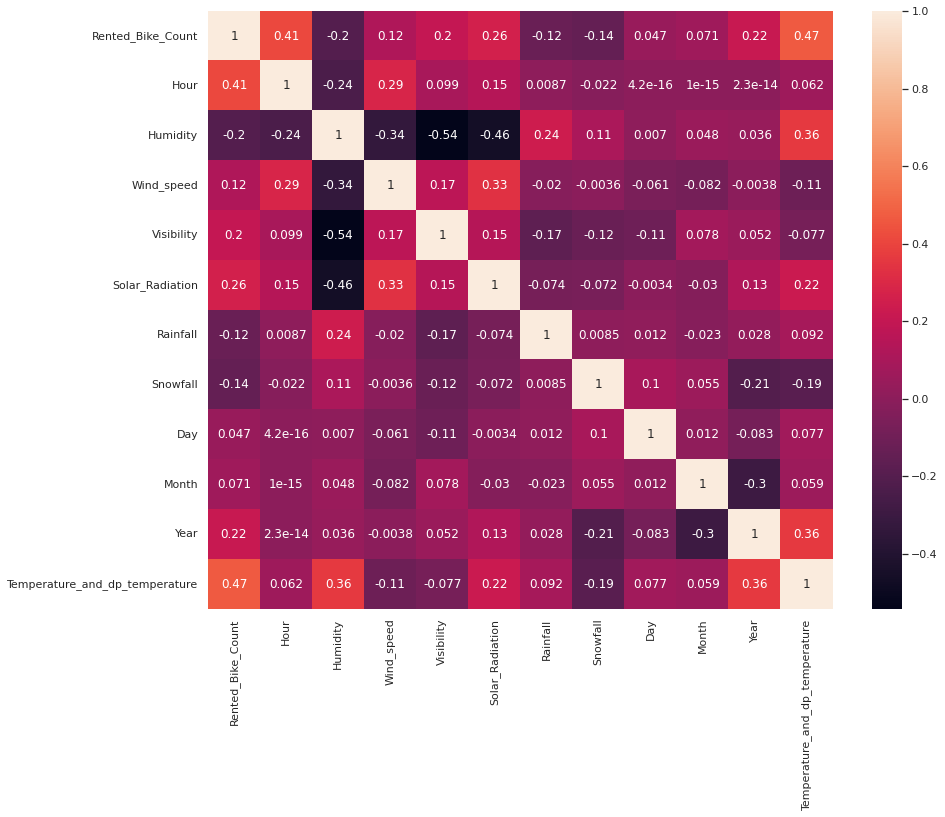

In [33]:
plt.figure(figsize=(14,11))
g=sns.heatmap(dataset.corr(),annot=True)

#Data Preparation

In [34]:
dataset_copy = dataset.copy()
dataset_copy.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year,Temperature_and_dp_temperature
0,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,-22.8
1,204,1,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,-23.1
2,173,2,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,-23.7
3,107,3,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,-23.8
4,78,4,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,-24.6


In [35]:
# One hot encoding
#creating dummies column for the given feature
dataset_copy=pd.get_dummies(dataset,drop_first=True)

In [36]:
dataset_copy.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Day,Month,Year,Temperature_and_dp_temperature,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,12,1,2017,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,12,1,2017,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,12,1,2017,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,12,1,2017,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,12,1,2017,-24.6,0,0,1,1,1


In [37]:
# shape of the data
dataset_copy.shape

(8760, 17)

###Implementing Linear Regression

For Linear Regression to be impemented we have to take certain assumptions.
1. **Linear relationship** - There should be linear relationship between feature variable and dependent variable.
2. **Little or no-multicollinearity** - There should not be multicollinearity among variables.
3. **Little or no auto-correlation** - Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
4. **Homoscedasticity** -  Variance should be same, i.e error term should be same across all values of the independent variable.

In [38]:
#Data for independent variables
X = dataset_copy.drop(labels ='Rented_Bike_Count',axis = 1)

#Data fdor Dependent variable 
y = np.sqrt(dataset_copy['Rented_Bike_Count'])

Let's now begin to train our model, first we need to split our data in train and test.


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 24)

In [40]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [43]:
reg.score(X_train,y_train)

0.6518220366862129

In [44]:
reg.coef_

array([ 4.98676663e-01, -2.24627136e-01,  1.69622617e-01, -5.06672126e-06,
       -7.54739501e-01, -1.45274068e+00,  1.81279768e-01, -1.29658470e-02,
       -1.77457180e-02, -2.48756193e+00,  2.47899202e-01, -2.99785198e+00,
       -2.96622550e+00, -9.03947992e+00,  2.89776526e+00,  2.85813416e+01])

In [45]:
len(reg.coef_)

16

In [46]:
reg.intercept_

5020.346342813962

In [47]:
y_pred = reg.predict(X_test)

In [48]:
y_pred

array([30.68575887, 10.34435027,  4.09807798, ..., 11.53039858,
       16.51367323,  4.86190384])

#Regression Evaluation metrics
---

1. **Mean Squared Error (MSE)** is the mean of the squared errors.
2. **Root Mean Squared Error (RMSE)**  is the square root of the mean of the squared errors.
3. **R-Squared** 
4. **Adujusted R-Squared**

In [49]:
#metrics for linear regression analysis for test dataset
MSE = mean_squared_error((y_test),(y_pred))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71126097463167
RMSE : 7.121183958769192
R2: 0.6710932500851713
Adjusted R2 : 0.668060104264631


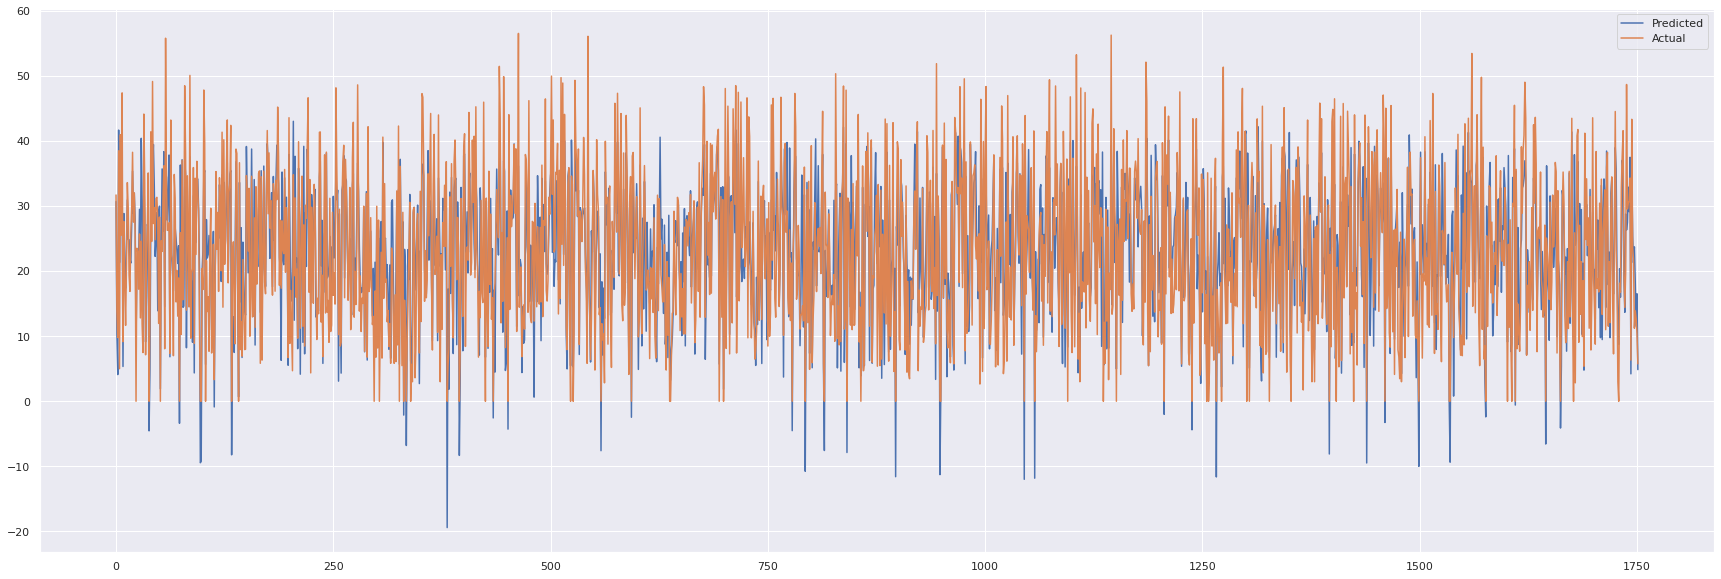

In [50]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

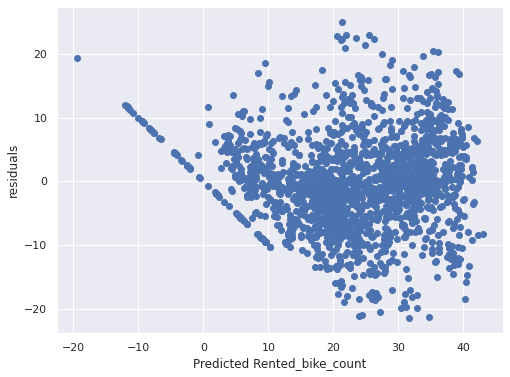

In [51]:
# Heteroscedasticity
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Implementing Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [53]:
lasso.score(X_train,y_train)

0.6518220210763701

In [54]:
lasso.coef_

array([ 4.98689559e-01, -2.24606552e-01,  1.69299223e-01, -4.62966490e-06,
       -7.54342947e-01, -1.45266703e+00,  1.80611292e-01, -1.29265617e-02,
       -1.74765188e-02, -2.48304519e+00,  2.47901772e-01, -2.99454695e+00,
       -2.96377036e+00, -9.03434670e+00,  2.89536380e+00,  2.85767101e+01])

In [55]:
lasso.intercept_

5011.231964660293

In [56]:
y_pred_l = lasso.predict(X_test)

In [57]:
#Evaluation metrics for lasso regression on test data
MSE = mean_squared_error((y_test),(y_pred_l))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_l)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71166994907342
RMSE : 7.12121267405162
R2: 0.6710905975292725
Adjusted R2 : 0.6680574272471217


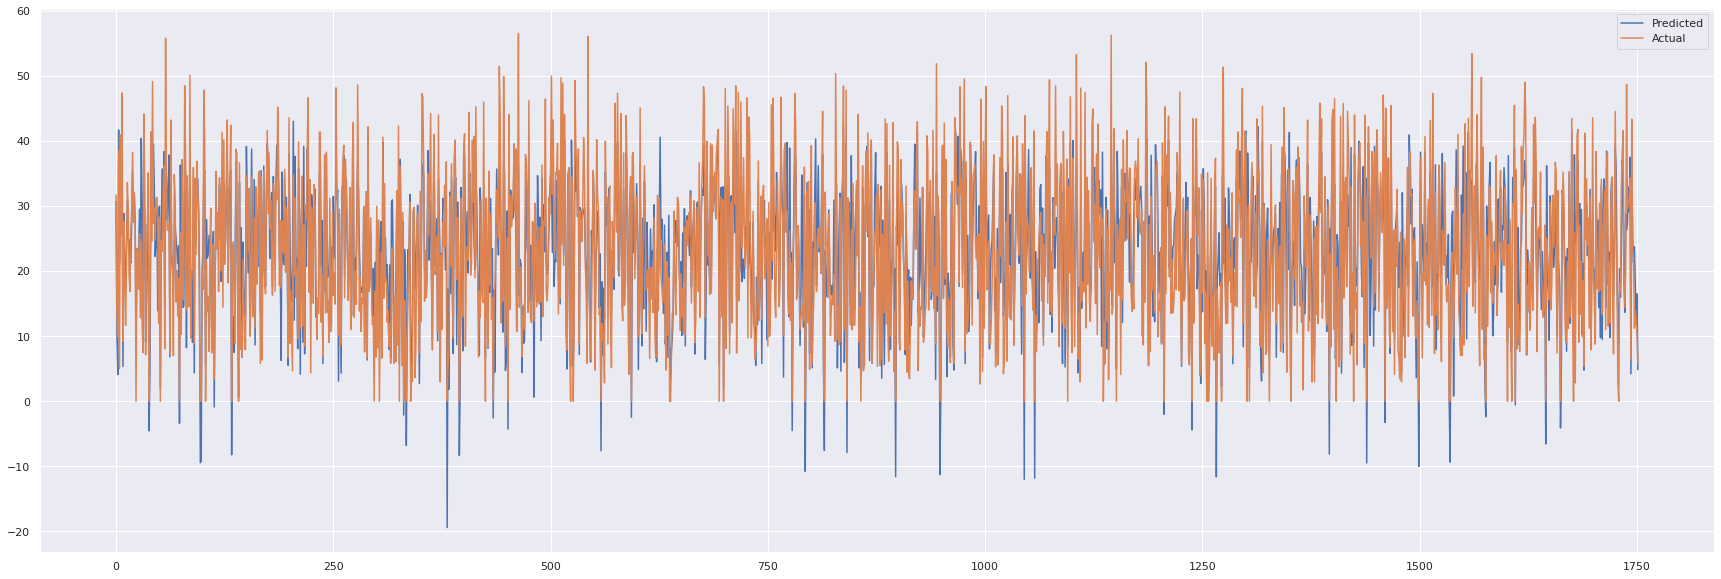

In [58]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_l))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

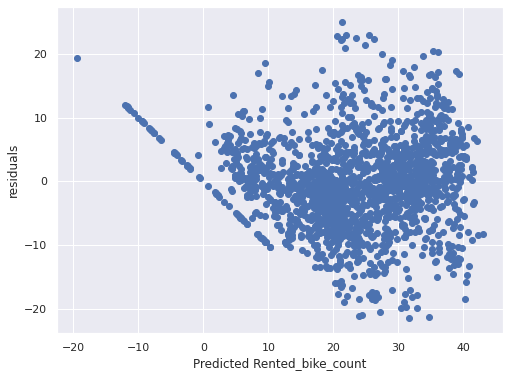

In [59]:
# Heteroscedasticity
plt.scatter((y_pred_l),(y_test)-(y_pred_l))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

####Implementing Cross-Validation Procedure for Lasso

---



In [60]:
##cross Validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [61]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -54.41566295189232


In [62]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [63]:
#Evaluation metrics for lasso regression on test data
MSE = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71557738931464
RMSE : 7.121487020932822
R2: 0.6710652543718449
Adjusted R2 : 0.6680318503775795


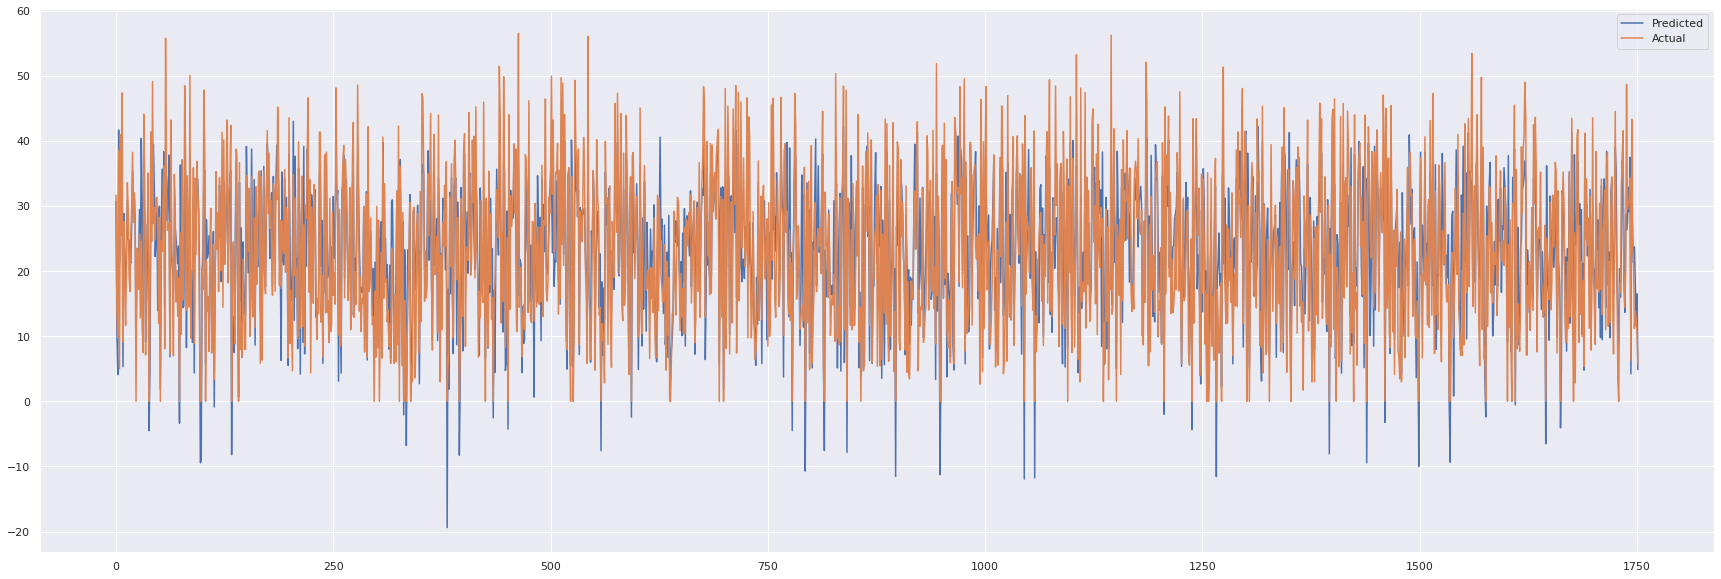

In [64]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_lasso))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

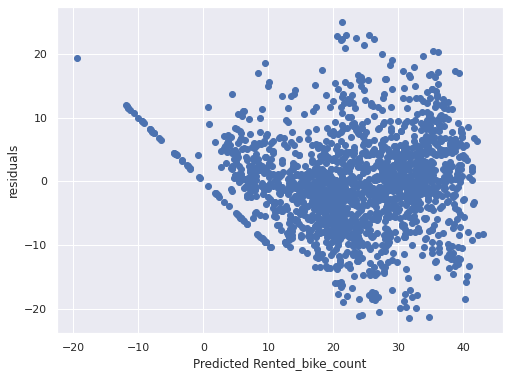

In [65]:
# Heteroscedasticity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Implementing Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [69]:
ridge.score(X_train,y_train)

0.6518219908440034

In [72]:
y_pred_r =ridge.predict(X_test)

In [74]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_r))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_r)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71117007673056
RMSE : 7.121177576548036
R2: 0.671093839637327
Adjusted R2 : 0.6680606992535791


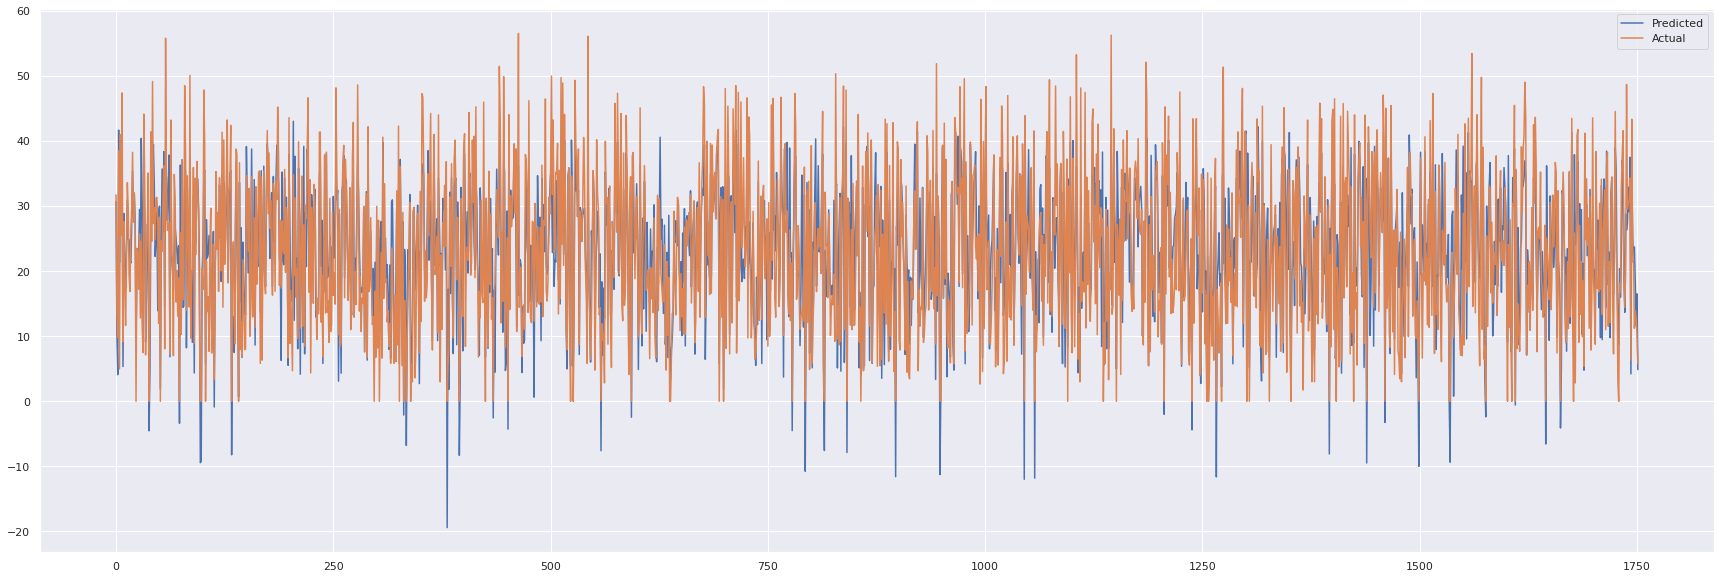

In [75]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_r))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

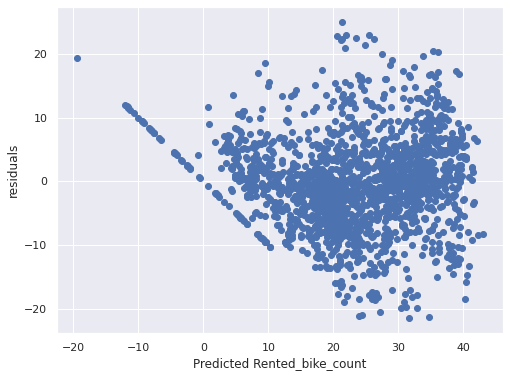

In [76]:
# Heteroscedasticity
plt.scatter((y_pred_r),(y_test)-(y_pred_r))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

###Running Grid Search Cross Validation for Ridge Regression

In [77]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [78]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.39823918538963


In [82]:
ridge_regressor.score(X_train,y_train)

-54.02089282208099

In [83]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [84]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.711251168967785
RMSE : 7.1211832702836535
R2: 0.6710933136834525
Adjusted R2 : 0.6680601684494094


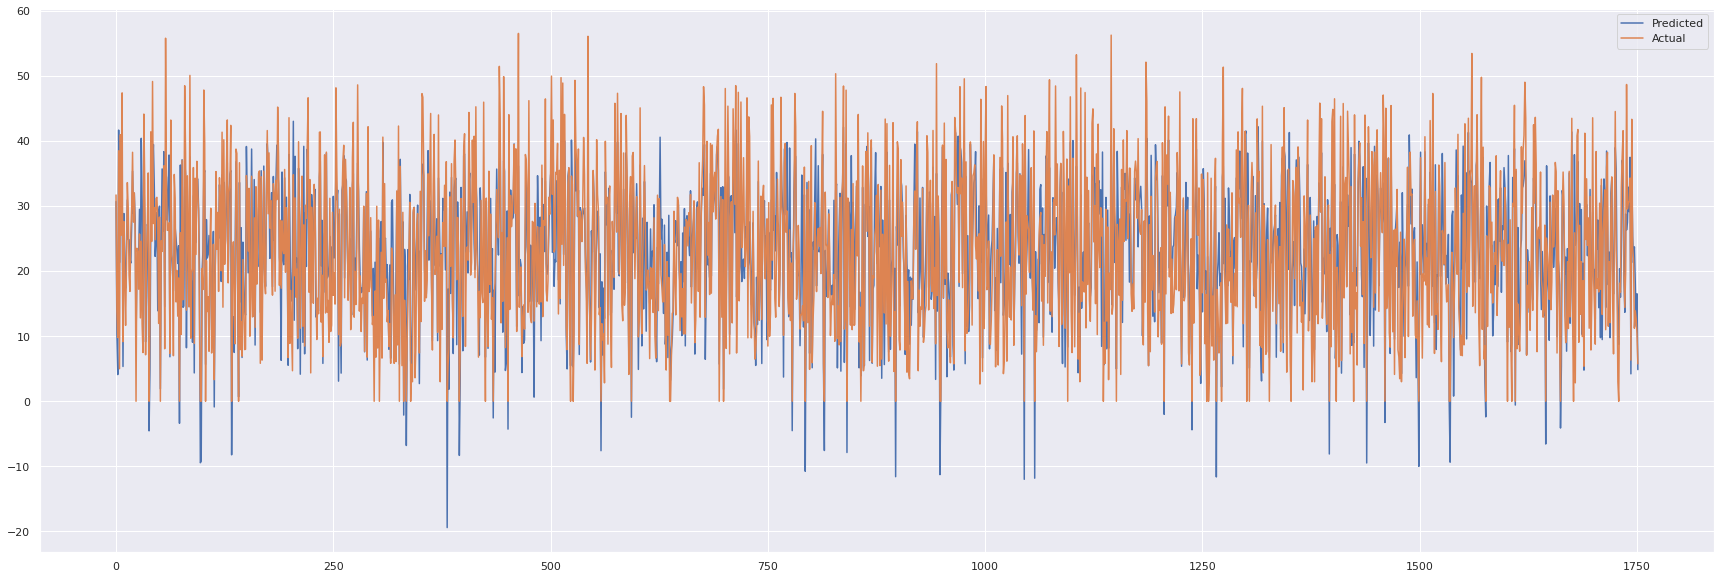

In [85]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_ridge))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

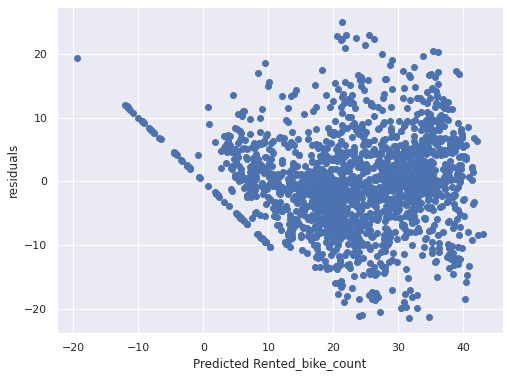

In [86]:
#Heteroscedasticity
plt.scatter((y_pred_ridge),(y_test - y_pred_ridge))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')